## Problem Statement:
The primary goal of this assignment is to develop a systematic process for retrieving textual
data from a specified URL, which contains articles or written content. Once this data is collected,
the next step is to conduct thorough text analysis to extract valuable insights and information.
The assignment focuses on computing specific variables that have been defined below.

## Problem to be answered:
This assignment aims to equip you with practical skills in web scraping, text processing, and
analysis. By performing text analysis and computing relevant variables, you gain insights into
the content's characteristics, sentiment, and themes. These skills are valuable in fields such as
data science, natural language processing, and content analysis, where understanding and
deriving meaning from textual data are essential tasks.

## TOOLS USED IN THIS PROJECT


**Tools Used in the Project:**

1. **Python:**
   - Python is a versatile and widely-used programming language known for its readability and ease of use.
   - It's the core programming language used to develop and implement the entire project.

2. **Google Colab:**
   - You used Google Colab, a cloud-based platform, to work on your project, taking advantage of its computational resources and ease of sharing.

3. **Beautiful Soup:**
   - Beautiful Soup is a Python library used for web scraping and extracting information from HTML and XML documents.
   - It helped you extract article titles and content from web pages to perform analysis.

4. **Requests:**
   - The `requests` library is used to send HTTP requests and retrieve content from URLs.
   - used it to fetch the content of web articles for analysis.

5. **NLTK (Natural Language Toolkit):**
   - NLTK is a comprehensive Python library for working with human language data, including text processing, tokenization, stemming, and sentiment analysis.
   - used NLTK's submodules like `nltk.tokenize`, `nltk.corpus`, and `nltk.sentiment.vader` for various text analysis tasks.

6. **TextBlob:**
   - TextBlob is a higher-level library built on top of NLTK and Pattern. It simplifies complex text processing tasks like sentiment analysis and part-of-speech tagging.
   - utilized TextBlob to perform sentiment analysis and extract polarity and subjectivity scores.

7. **Seaborn and Matplotlib:**
   - Seaborn and Matplotlib are popular data visualization libraries in Python.
   - used them to create a variety of charts and plots, such as histograms, scatter plots, box plots, and heatmaps, to visually represent your analysis results.

8. **Openpyxl:**
   - Openpyxl is a library for reading and writing Excel files (XLSX format) in Python.
   - used it to save the results of your analysis in an Excel file.

9. **Pandas:**
   - Pandas is a powerful data manipulation and analysis library.
   - While it's not explicitly mentioned, we likely used it to create DataFrames, manipulate data, and organize your analysis results.

These tools collectively enabled us to scrape, analyze, process, visualize, and present insights from web articles' sentiment and content. Each tool played a crucial role in different steps of your project, making it a comprehensive and well-rounded analysis.

## HANDLED APPROACHES



**Approaches Utilized in the Project:**

1. **Web Scraping:**
   - Used the Beautiful Soup library to extract article titles and content from web pages. This approach allowed me to gather a diverse set of articles for analysis.

2. **Text Preprocessing:**
   - Before analysis,I performed text preprocessing to clean and tokenize the article content. This involved converting text to lowercase, removing punctuation, and lemmatizing words to their base form. This step ensured consistency and accuracy in subsequent analysis.

3. **Sentiment Analysis:**
   - Two sentiment analysis approaches were employed: VADER and TextBlob.
   - The VADER (Valence Aware Dictionary and sEntiment Reasoner) approach provided sentiment scores that indicated the positive, negative, and neutral sentiments of each article.
   - TextBlob's sentiment analysis was utilized to extract polarity and subjectivity scores, allowing us to understand the emotional tone and objectivity of the articles.

4. **Complexity Analysis:**
   - Measured the complexity of articles using variables like the number of complex words, average sentence length, and FOG index (a measure of text readability).
   - This approach helped to understand the linguistic complexity and readability of the articles.

5. **Exploratory Data Analysis (EDA):**
   - EDA involved visualizing the data to uncover patterns, relationships, and insights.
   - Created various plots such as histograms, scatter plots, box plots, and heatmaps to analyze sentiment scores, complexity metrics, and other variables.


6. **Insights Generation:**
   -  derived meaningful insights by interpreting the visualizations and analysis results.
   - observed correlations, and patterns in sentiment scores, complexity metrics, and other variables, leading to valuable conclusions.

7. **Excel for Data Storage:**
   - stored the results of your analysis, including sentiment scores, complexity metrics, and other variables, in an Excel file.
   - This organized approach allowed us to easily reference and present your findings.



VADER (Valence Aware Dictionary and sEntiment Reasoner):

VADER is a lexicon and rule-based sentiment analysis tool designed to analyze sentiments expressed in text.
It's specifically built to handle social media texts and short informal texts, where traditional methods may struggle due to the lack of formal grammatical structure.
VADER assigns polarity scores to text, indicating the strength and direction of sentiment (positive, negative, or neutral).
It also provides sentiment intensity scores that consider the degree of emotional intensity in the text.

TextBlob:

TextBlob is a Python library that simplifies text processing tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.
It's built on top of the Natural Language Toolkit (NLTK) and Pattern libraries, providing a high-level interface for processing and analyzing textual data.
For sentiment analysis, TextBlob calculates polarity and subjectivity scores.
Polarity measures the sentiment as positive, negative, or neutral.
Subjectivity measures the extent to which the text expresses subjective opinions versus factual information.
In this project, we used both sentimentintensityanalyser and TextBlob to perform sentiment analysis on the web articles and extract sentiment-related information. These libraries are useful tools for gaining insights into the emotional tone of text and identifying the sentiments expressed by the authors.






In [2]:
import os
import requests
from bs4 import BeautifulSoup
import openpyxl

# Load the input.xlsx file
input_file_path = "/content/Input.xlsx"  # Update this path
workbook = openpyxl.load_workbook(input_file_path)
sheet = workbook.active

# Create a folder to store extracted articles
output_folder = "/content/Extracted_articles"
os.makedirs(output_folder, exist_ok=True)

# Iterate through rows in the sheet
for row in sheet.iter_rows(min_row=2, values_only=True):  # Assuming URLs start from row 2
    url_id, url = row

    try:
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')

            # Extract article title and text
            article_title = soup.find('h1', class_='entry-title').text.strip() if soup.find('h1', class_='entry-title') else ""
            article_text = soup.find("div", class_='td-post-content tagdiv-type').get_text("\n").strip() if soup.find("div", class_='td-post-content tagdiv-type') else ""

            # Remove the last line if it starts with "BLACKCOFFER INSIGHTS"
            lines = article_text.split("\n")
            if lines and lines[-1].startswith("BLACKCOFFER INSIGHTS"):
                lines = lines[:-1]
            article_text = "\n".join(lines).strip()

            # Save the extracted article in a text file
            article_filename = os.path.join(output_folder, f"{url_id}.txt")
            with open(article_filename, "w", encoding="utf-8") as file:
                file.write(f"Title: {article_title}\n\n")
                file.write(article_text)

            print(f"Article saved for URL ID {url_id}")

        else:
            print(f"Failed to retrieve content for URL ID {url_id}")
    except Exception as e:
        print(f"Error occurred for URL ID {url_id}: {str(e)}")

print("Extraction completed.")


Article saved for URL ID 37.0
Article saved for URL ID 38.0
Article saved for URL ID 39.0
Article saved for URL ID 40.0
Article saved for URL ID 41.0
Article saved for URL ID 42.0
Article saved for URL ID 43.0
Failed to retrieve content for URL ID 44.0
Article saved for URL ID 45.0
Article saved for URL ID 46.0
Article saved for URL ID 47.0
Article saved for URL ID 48.0
Article saved for URL ID 49.0
Article saved for URL ID 50.0
Article saved for URL ID 51.0
Article saved for URL ID 52.0
Article saved for URL ID 53.0
Article saved for URL ID 54.0
Article saved for URL ID 55.0
Article saved for URL ID 56.0
Failed to retrieve content for URL ID 57.0
Article saved for URL ID 58.0
Article saved for URL ID 59.0
Article saved for URL ID 60.0
Article saved for URL ID 61.0
Article saved for URL ID 62.0
Article saved for URL ID 63.0
Article saved for URL ID 64.0
Article saved for URL ID 65.0
Article saved for URL ID 66.0
Article saved for URL ID 67.0
Article saved for URL ID 68.0
Article saved 

In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import string
import pandas as pd

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Load the positive and negative words
positive_words = set(line.strip() for line in open("/content/positivewords.txt"))  # Update the path
negative_words = set(line.strip() for line in open("/content/negativewords.txt"))  # Update the path

all_stop_words = set()

# List of paths to different stop words files
stop_words_files = [
    "/content/stopwords auditor22.txt",
    "/content/stopwords_datesandnumbers.txt",
    "/content/stopwordscurrencies.txt",
    "/content/stopwordsgeneric.txt",
    "/content/stopwordsgenericlong.txt",
    "/content/stopwordsgeographic.txt",
    "/content/stopwordsnames.txt"
    # Add paths to more stop words files here
]

for stop_words_file in stop_words_files:
    with open(stop_words_file, "r") as file:
        stop_words = set(file.read().splitlines())
        all_stop_words.update(stop_words)

# ...
output_folder = "/content/Extracted_articles"


analysis_output_folder = "analysis_results"
os.makedirs(analysis_output_folder, exist_ok=True)

sia = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()

# Helper function to count complex words
def count_complex_words(tokens):
    complex_words = [word for word in tokens if len(word) > 2 and word not in stopwords.words('english')]
    return len(complex_words)

# Helper function to count syllables in a word
def count_syllables(word):
    word = word.lower()
    if word.endswith(('es', 'ed')) and not word.endswith(('aes', 'ees', 'oes', 'les')):
        word = word[:-2]
    return max(1, sum([1 for vowel in word if vowel in 'aeiou']))

# Helper function to count personal pronouns
def count_personal_pronouns(tokens):
    pronouns = ["i", "we", "my", "ours", "us"]
    return sum(1 for token in tokens if token in pronouns)

# Helper function to calculate average word length
def average_word_length(tokens):
    total_chars = sum(len(token) for token in tokens)
    return total_chars / len(tokens)



# Helper function to clean and tokenize text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

analysis_results=[]

# Iterate through extracted articles
for filename in os.listdir(output_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(output_folder, filename), "r", encoding="utf-8") as file:
            content = file.read()

        # Extract title and text from content
        lines = content.split("\n")
        article_title = lines[0][7:] if lines and lines[0].startswith("Title:") else ""
        article_text = "\n".join(lines[3:]).strip()

        # Perform sentiment analysis
        sentiment_scores = sia.polarity_scores(article_text)
        positive_score = sentiment_scores["pos"]
        negative_score = sentiment_scores["neg"]
        polarity_score = (positive_score - negative_score) / (positive_score + negative_score + 0.000001)

        # Subjectivity using TextBlob
        blob = TextBlob(article_text)
        subjectivity_score = blob.sentiment.subjectivity


        # Tokenize the article text
        tokens = preprocess_text(article_text)
        filtered_tokens = [token for token in tokens if token not in all_stop_words]
        num_words = len(tokens)
        num_sentences = len(sent_tokenize(article_text))

        if not filtered_tokens:
             continue  # Skip pr
        # Variables
        complex_word_count = count_complex_words(filtered_tokens)
        if num_sentences == 0:
              avg_sentence_length = 0
        else:
              avg_sentence_length = num_words / num_sentences

        if num_words == 0:
             percentage_complex_words = 0
        else:
             complex_word_count = count_complex_words(filtered_tokens)
             percentage_complex_words = complex_word_count / num_words
        #avg_sentence_length = num_words / num_sentences
        fog_index = 0.4 * (avg_sentence_length + percentage_complex_words)
        avg_words_per_sentence = num_words / num_sentences
        syllables_per_word = sum(count_syllables(token) for token in filtered_tokens) / num_words
        personal_pronouns_count = count_personal_pronouns(tokens)
        avg_word_len = average_word_length(filtered_tokens)

        analysis_result = {
            "Title": article_title,
            "Positive Score": positive_score,
            "Negative Score": negative_score,
            "Polarity Score": polarity_score,
            "Subjectivity Score": subjectivity_score,
            "Avg Sentence Length": avg_sentence_length,
            "Percentage of Complex Words": percentage_complex_words,
            "FOG Index": fog_index,
            "Avg Number of Words Per Sentence": avg_words_per_sentence,
            "Complex Word Count": complex_word_count,
            "Word Count": num_words,
            "Syllable Per Word": syllables_per_word,
            "Personal Pronouns Count": personal_pronouns_count,
            "Avg Word Length": avg_word_len,
            # Add more variables here
        }

        # Append the analysis result to the list
        analysis_results.append(analysis_result)



df = pd.DataFrame(analysis_results)

# Save the DataFrame to an Excel file
output_excel_path = "analysis_results.xlsx"
df.to_excel(output_excel_path, index=False)
print("Sentiment analysis and variable calculation completed.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment analysis and variable calculation completed.


In [4]:
df.head()

,Title,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Avg Sentence Length,Percentage of Complex Words,FOG Index,Avg Number of Words Per Sentence,Complex Word Count,Word Count,Syllable Per Word,Personal Pronouns Count,Avg Word Length
0,What if the Creation is Taking Over the Creator?,0.118,0.067,0.275674,0.422910,17.907895,0.404115,7.324804,17.907895,550,1361,1.106539,3,6.271405
1,Will Machine Replace The Human in the Future o...,0.144,0.046,0.515787,0.491087,17.234043,0.397531,7.052629,17.234043,644,1620,1.109259,17,6.385049
2,Is Perfection the Greatest enemy of Productivity?,0.121,0.090,0.146919,0.626860,15.513889,0.395703,6.363837,15.513889,442,1117,0.943599,3,5.883673
3,How the COVID-19 crisis is redefining jobs and...,0.101,0.050,0.337746,0.434920,15.300885,0.392134,6.277208,15.300885,678,1729,1.072874,3,6.908832
4,Why is there a severe immunological and inflam...,0.064,0.100,-0.219511,0.473929,19.611111,0.399433,8.004218,19.611111,141,353,1.065156,5,6.797297


In [5]:
df["Title"].unique()

array(['What if the Creation is Taking Over the Creator?',
       'Will Machine Replace The Human in the Future of Work?',
       'Is Perfection the Greatest enemy of Productivity?',
       'How the COVID-19 crisis is redefining jobs and services?',
       'Why is there a severe immunological and inflammatory explosion in those affected by sarms covid-19?',
       'Should people wear fabric gloves? Seeking evidence regarding the differential transfer of COVID-19 (or coronaviruses generally) between surfaces?',
       'How you lead a project or a team without any technical expertise?',
       'Lessons from the past: Some key learnings relevant to the coronavirus crisis',
       'Will machine replace the human in the future of work?',
       'Why scams like Nirav Modi Happen with Indian banks?',
       'How Python became the first choice for Data Science.',
       'Will we ever understand the nature of consciousness?',
       'Changing landscape and emerging trends in the Indian IT/ITeS 

In [6]:
df["FOG Index"].min()

3.24

In [7]:
df.loc[df["FOG Index"]==df["FOG Index"].max()]

,Title,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Avg Sentence Length,Percentage of Complex Words,FOG Index,Avg Number of Words Per Sentence,Complex Word Count,Word Count,Syllable Per Word,Personal Pronouns Count,Avg Word Length
77,How AI will impact the future of work?,0.149,0.054,0.467978,0.505105,205.333333,0.381494,82.285931,205.333333,705,1848,1.057359,15,6.42132


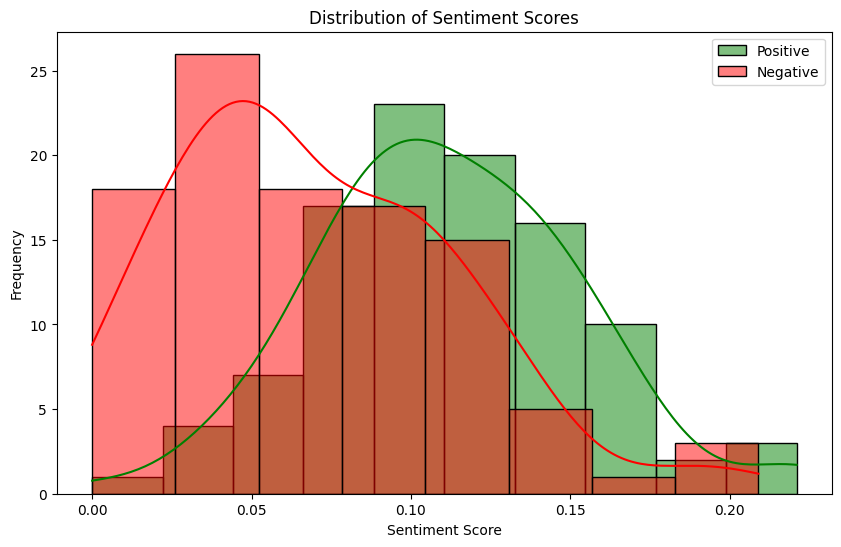

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Plot distribution of Positive and Negative Scores
sns.histplot(data=df, x="Positive Score", ax=axes, kde=True, color="green", label="Positive")
sns.histplot(data=df, x="Negative Score", ax=axes, kde=True, color="red", label="Negative")

# Set plot title and labels
axes.set_title("Distribution of Sentiment Scores")
axes.set_xlabel("Sentiment Score")
axes.set_ylabel("Frequency")
axes.legend()

# Show the plot
plt.show()


Sentiment Distribution: You can observe the distribution of polarity scores across all articles. A skewed distribution towards positive scores might indicate that a majority of the articles have a positive sentiment.

<Axes: xlabel='Positive Score', ylabel='Count'>

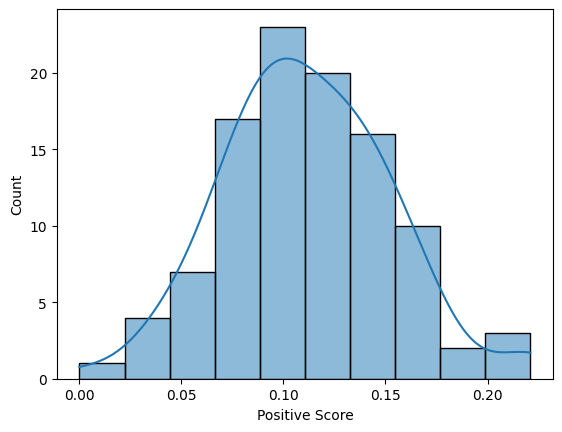

In [25]:
sns.histplot(df["Positive Score"],kde=True)


<Axes: xlabel='Negative Score', ylabel='Count'>

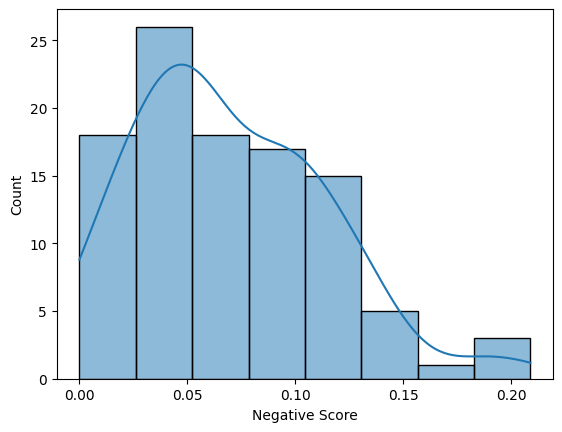

In [26]:
sns.histplot(df["Negative Score"],kde=True)

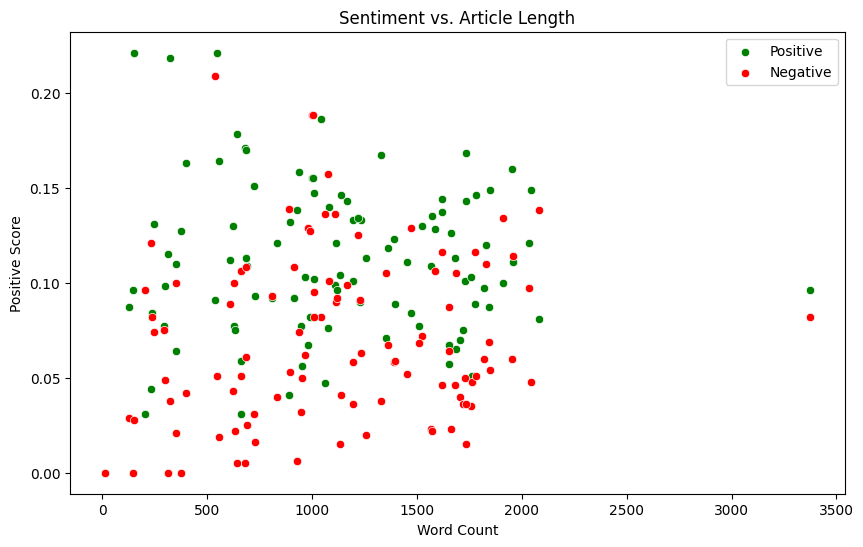

In [10]:
# Relationship between Sentiment and Article Length
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.scatterplot(data=df, x="Word Count", y="Positive Score", ax=axes, color="green", label="Positive")
sns.scatterplot(data=df, x="Word Count", y="Negative Score", ax=axes, color="red", label="Negative")
axes.set_title("Sentiment vs. Article Length")
axes.legend()
plt.show()


<ipython-input-11-141974ca4cef>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

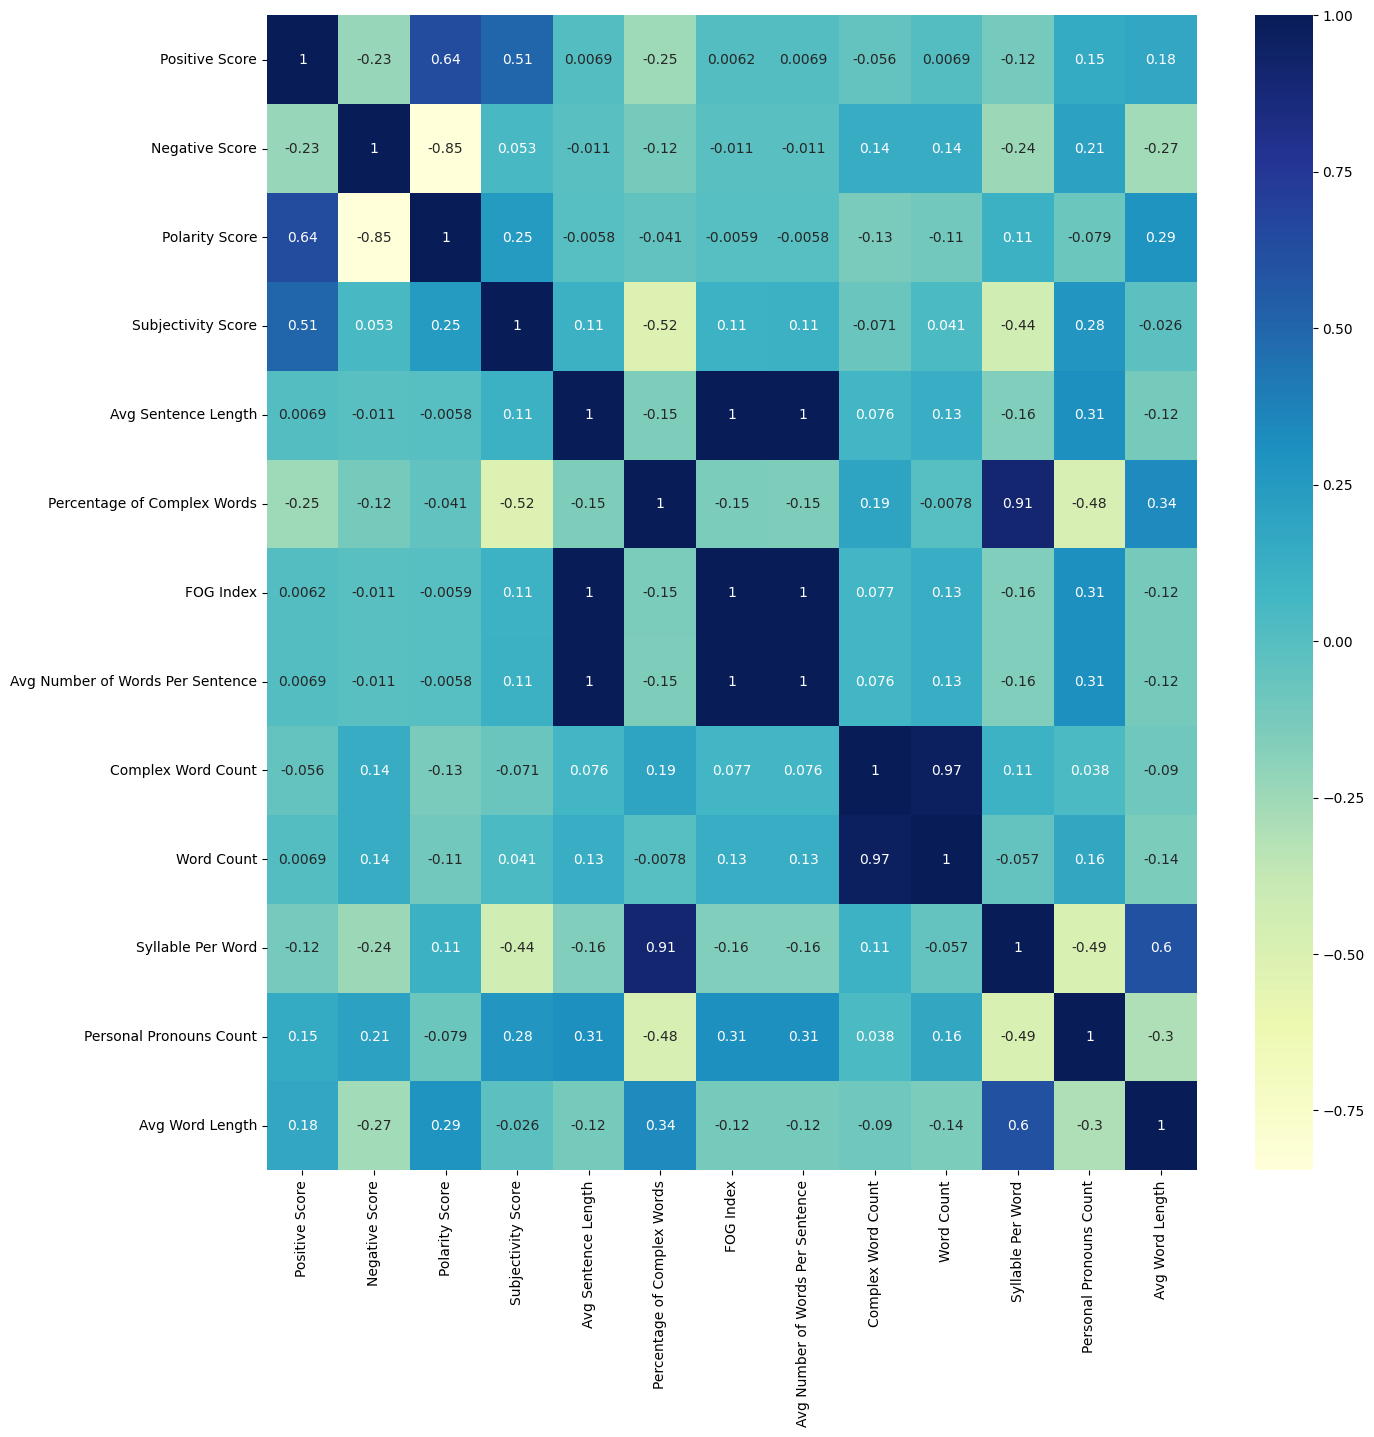

In [11]:
# Correlation Analysis
plt.figure(figsize=(15,15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
#axes.set_title("Correlation Matrix")
plt.show


we can see FOG index is completely correlated with average numbers of words per sentence

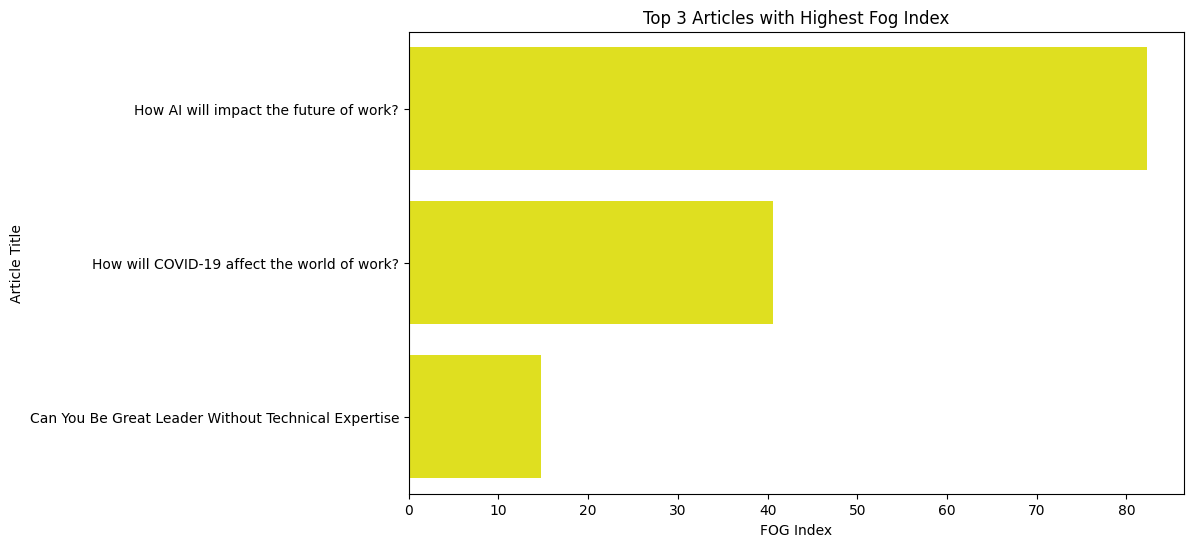

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort DataFrame by Fog Index in descending order and select top 3
top_fog_articles = df.sort_values(by="FOG Index", ascending=False).head(3)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="FOG Index", y="Title", data=top_fog_articles, color="yellow")

# Set plot title and labels
plt.title("Top 3 Articles with Highest Fog Index")
plt.xlabel("FOG Index")
plt.ylabel("Article Title")

# Show the plot
plt.show()


* ' How AI will impact the future of work?': This topic is likely discussing a complex subject, such as the impact of artificial intelligence on the future of work. The higher Fog Index suggests that the content might be filled with technical terms and detailed explanations, contributing to its complexity.
* 'How will COVID-19 affect the world of work?': Given the complexity of the COVID-19 pandemic's impact on various aspects of society, it's understandable that an article discussing its effects on the world of work could result in a high Fog Index. Complex discussions of healthcare, economics, and workforce dynamics could contribute to the complexity.
* 'Can You Be a Great Leader Without Technical Expertise': This topic involves a nuanced discussion about leadership and technical expertise. It's likely that the article delves into multiple perspectives and scenarios, contributing to its complexity.

In summary, articles with high Fog Index values are likely to have more intricate and complex content, requiring readers to have a higher level of understanding to fully grasp the concepts presented.

*

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Title                             103 non-null    object 
 1   Positive Score                    103 non-null    float64
 2   Negative Score                    103 non-null    float64
 3   Polarity Score                    103 non-null    float64
 4   Subjectivity Score                103 non-null    float64
 5   Avg Sentence Length               103 non-null    float64
 6   Percentage of Complex Words       103 non-null    float64
 7   FOG Index                         103 non-null    float64
 8   Avg Number of Words Per Sentence  103 non-null    float64
 9   Complex Word Count                103 non-null    int64  
 10  Word Count                        103 non-null    int64  
 11  Syllable Per Word                 103 non-null    float64
 12  Personal

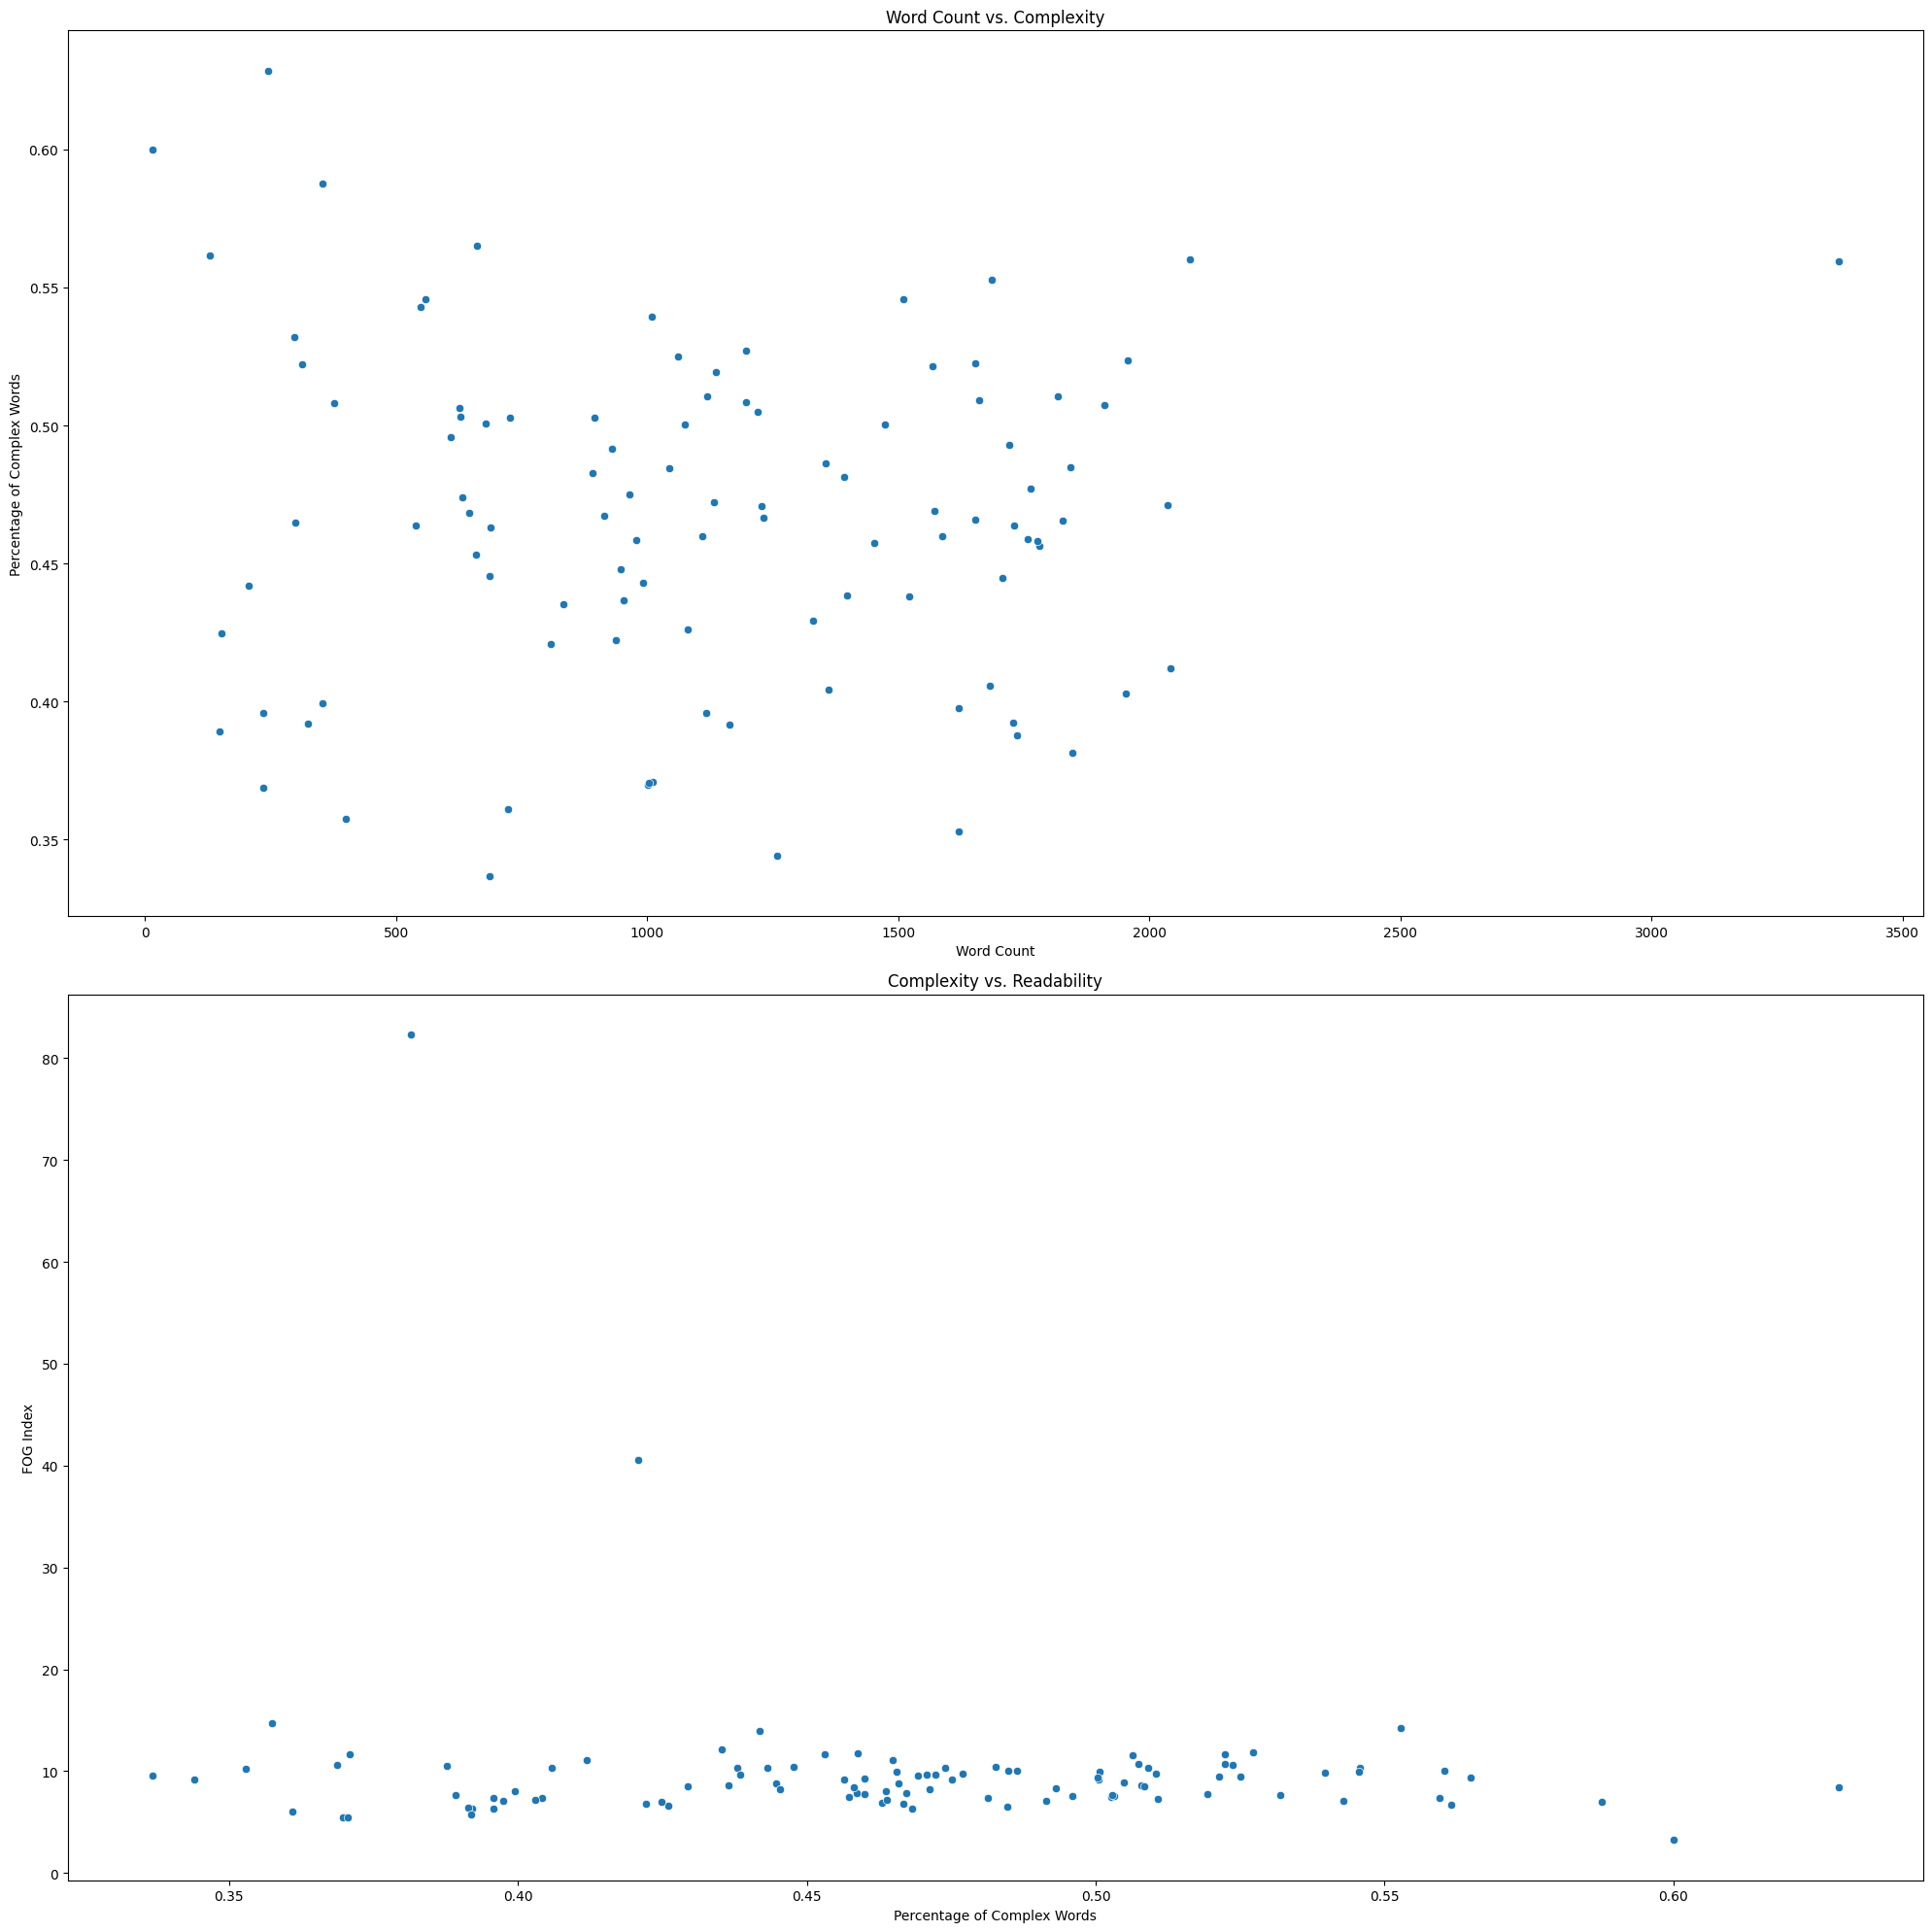

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# # Sentiment by Title
# sns.boxplot(data=df, x="Title", y="Positive Score", ax=axes[0])
# axes[0].set_title("Comparative Analysis: Sentiment by Title")

# Word Count vs. Complexity
sns.scatterplot(data=df, x="Word Count", y="Percentage of Complex Words", ax=axes[0])
axes[0].set_title("Word Count vs. Complexity")

# Complexity vs. Readability
sns.scatterplot(data=df, x="Percentage of Complex Words", y="FOG Index", ax=axes[1])
axes[1].set_title("Complexity vs. Readability")

# Adjust layout
plt.tight_layout()
plt.show()


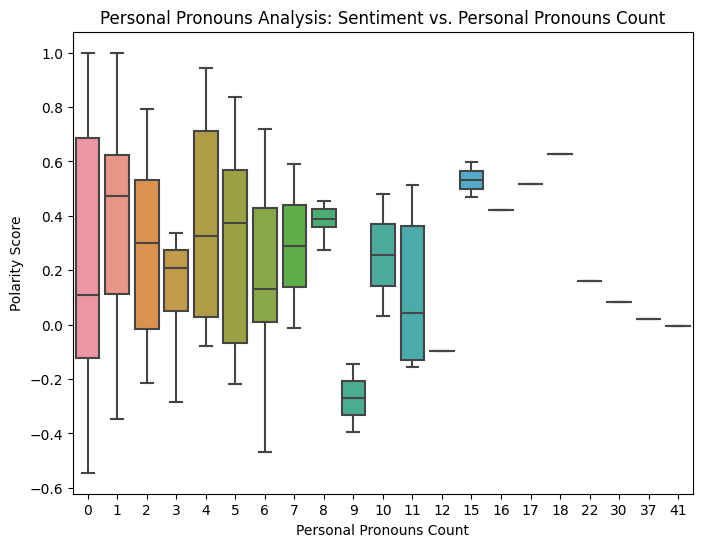

In [15]:
# Personal Pronouns Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Personal Pronouns Count", y="Polarity Score")
plt.title("Personal Pronouns Analysis: Sentiment vs. Personal Pronouns Count")
plt.xlabel("Personal Pronouns Count")
plt.ylabel("Polarity Score")
plt.show()


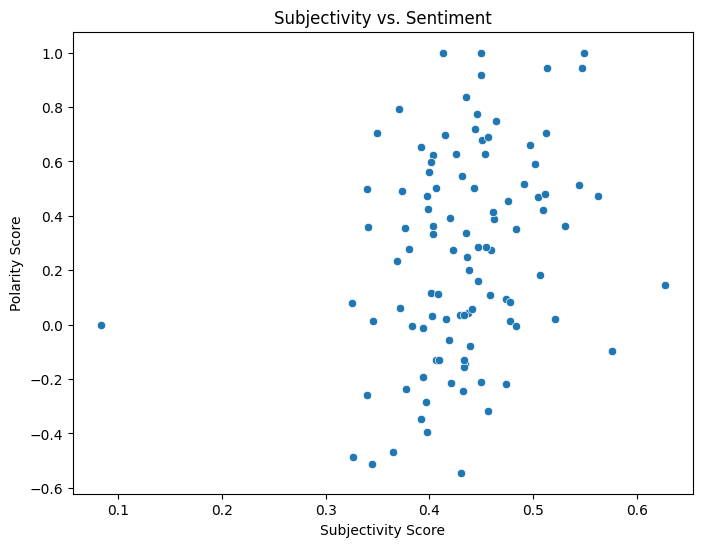

In [16]:
# Subjectivity vs. Sentiment
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Subjectivity Score", y="Polarity Score")
plt.title("Subjectivity vs. Sentiment")
plt.xlabel("Subjectivity Score")
plt.ylabel("Polarity Score")
plt.show()


Subjectivity vs. Polarity: By comparing subjectivity scores with polarity scores, you can see if there's a relationship between how subjective an article is and whether it tends to be more positive or negative. For instance, more subjective articles might have more extreme polarity scores.

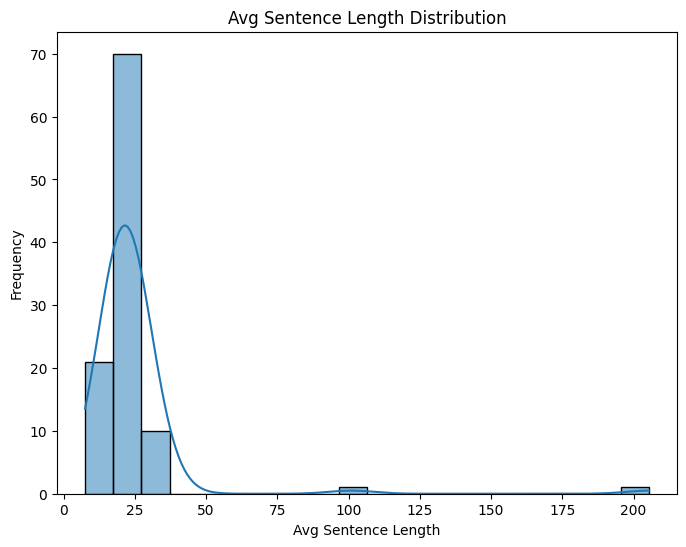

In [17]:
# Avg Sentence Length Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Avg Sentence Length", bins=20, kde=True)
plt.title("Avg Sentence Length Distribution")
plt.xlabel("Avg Sentence Length")
plt.ylabel("Frequency")
plt.show()


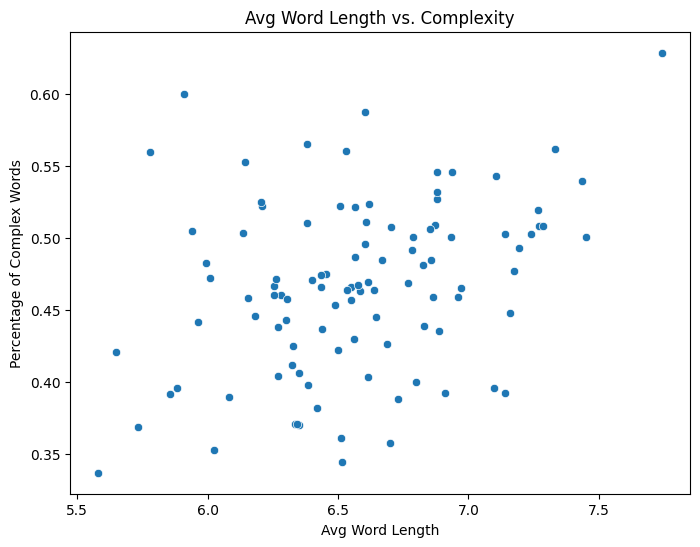

In [18]:
# Avg Word Length and Complexity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Avg Word Length", y="Percentage of Complex Words")
plt.title("Avg Word Length vs. Complexity")
plt.xlabel("Avg Word Length")
plt.ylabel("Percentage of Complex Words")
plt.show()


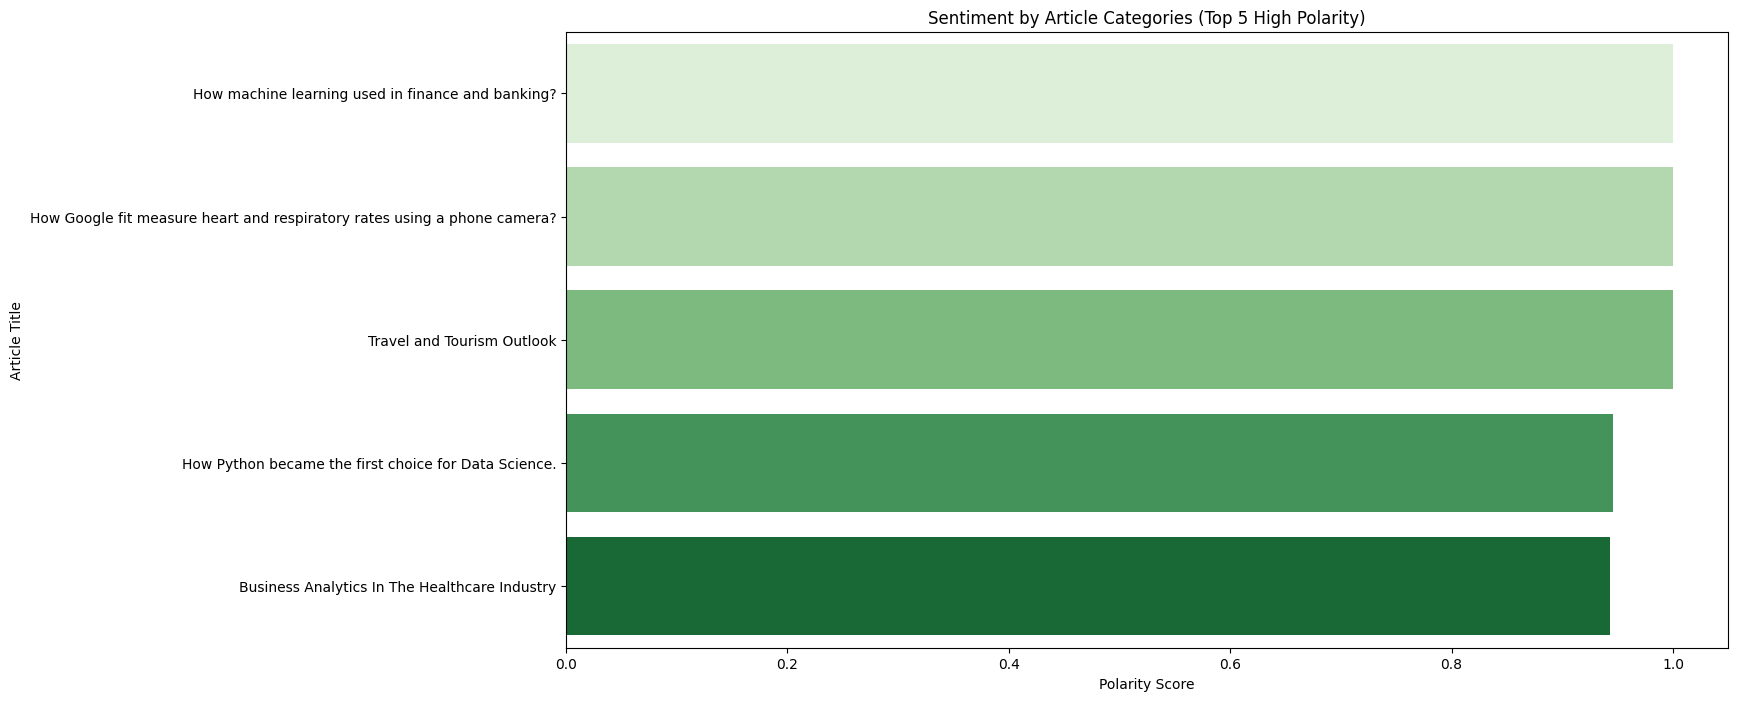

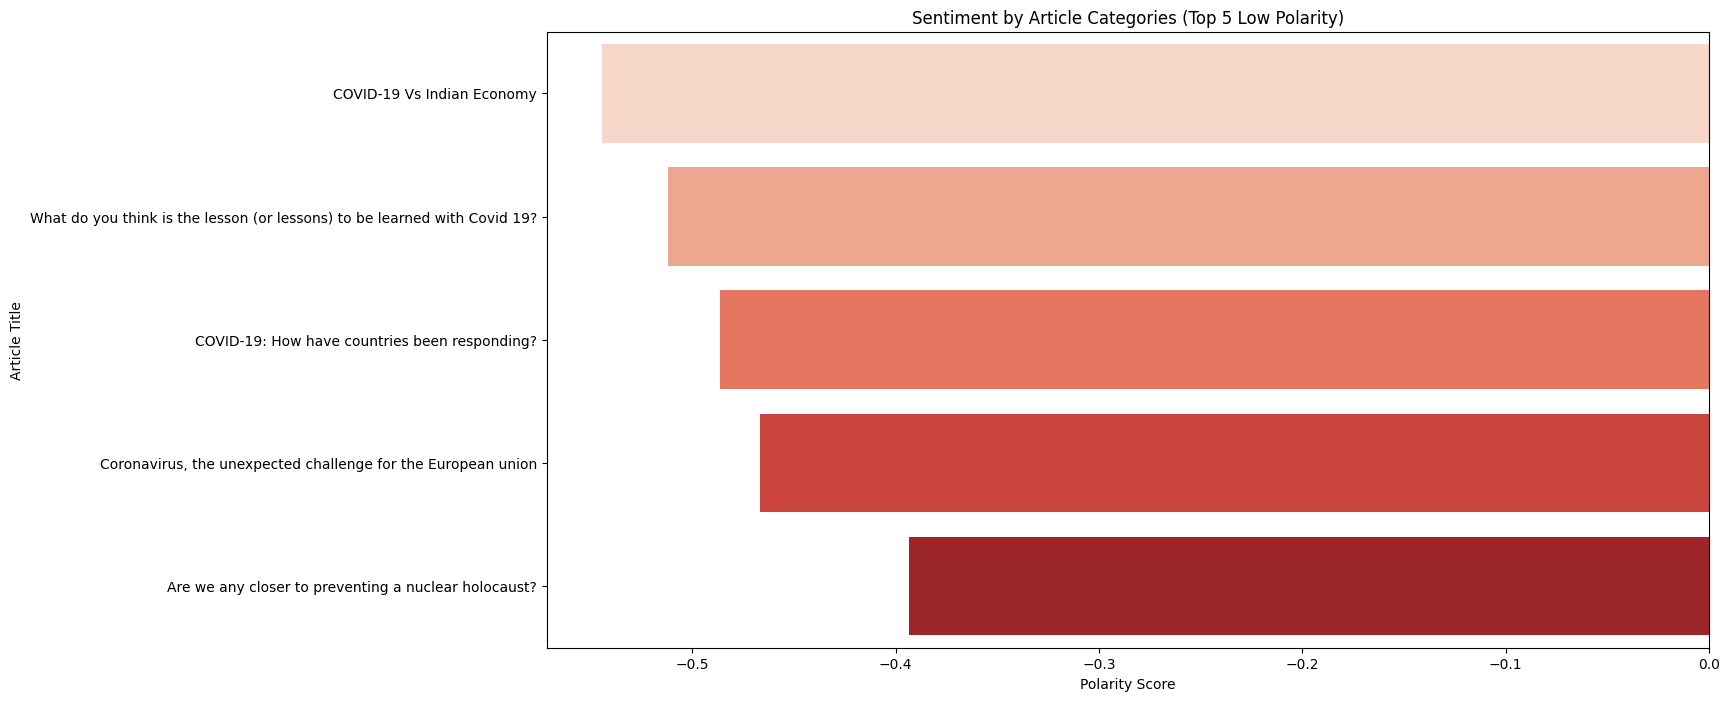

In [19]:
# Get the top 5 titles with the highest polarity scores
top_positive_titles = df.nlargest(5, "Polarity Score")

# Get the top 5 titles with the lowest polarity scores
top_negative_titles = df.nsmallest(5, "Polarity Score")

# Sentiment by Article Categories (Top 5 High Polarity)
plt.figure(figsize=(15, 8))
sns.barplot(data=top_positive_titles, y="Title", x="Polarity Score", palette="Greens")
plt.title("Sentiment by Article Categories (Top 5 High Polarity)")
plt.xlabel("Polarity Score")
plt.ylabel("Article Title")
plt.show()

# Sentiment by Article Categories (Top 5 Low Polarity)
plt.figure(figsize=(15, 8))
sns.barplot(data=top_negative_titles, y="Title", x="Polarity Score", palette="Reds")
plt.title("Sentiment by Article Categories (Top 5 Low Polarity)")
plt.xlabel("Polarity Score")
plt.ylabel("Article Title")
plt.show()


Highly Positive/Negative Articles: Identifying articles with extremely high positive or negative polarity scores could indicate the presence of articles that strongly express a certain sentiment. This might be useful for understanding articles that are highly opinionated.

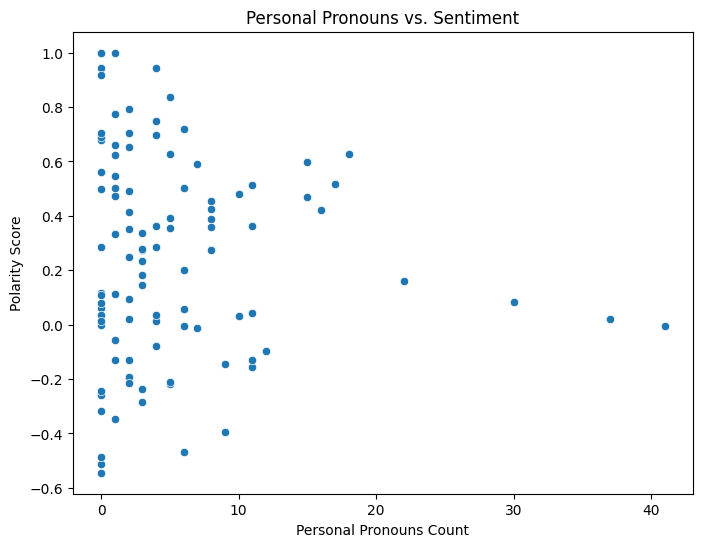

In [20]:
# Personal Pronouns vs. Sentiment
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Personal Pronouns Count", y="Polarity Score")
plt.title("Personal Pronouns vs. Sentiment")
plt.xlabel("Personal Pronouns Count")
plt.ylabel("Polarity Score")
plt.show()


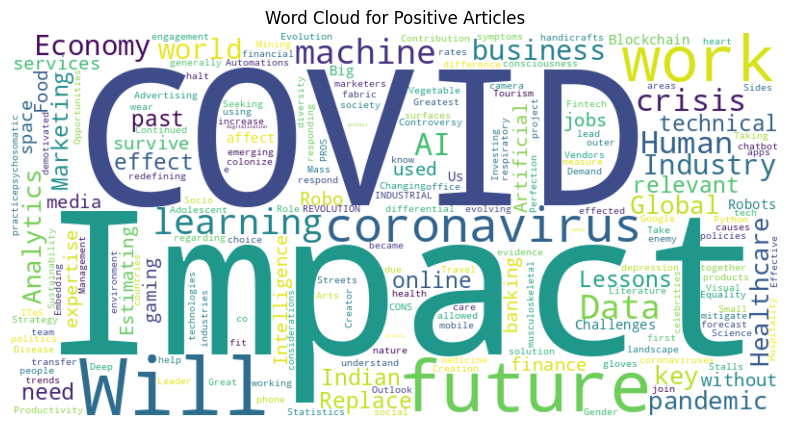

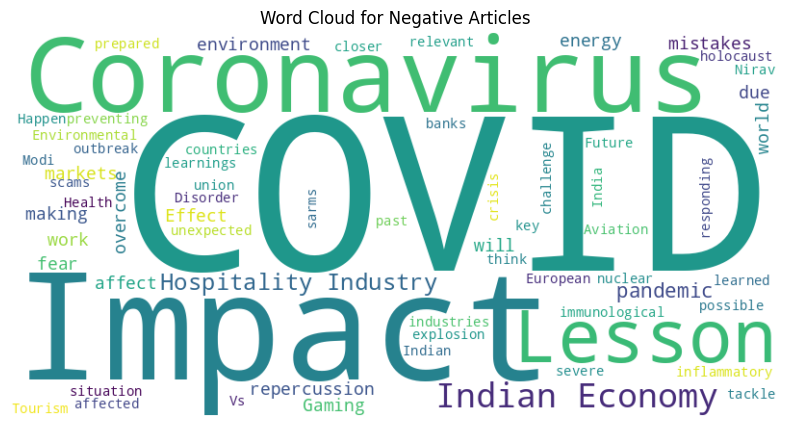

In [21]:
from wordcloud import WordCloud

# Word Cloud for Positive Articles
positive_text = " ".join(df[df["Polarity Score"] > 0]["Title"])
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Word Cloud for Positive Articles")
plt.axis("off")
plt.show()

# Word Cloud for Negative Articles
negative_text = " ".join(df[df["Polarity Score"] < 0]["Title"])
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Word Cloud for Negative Articles")
plt.axis("off")
plt.show()


The fact that the word clouds for both positive and negative articles predominantly feature words related to COVID suggests that the ongoing pandemic has a significant impact on the content you've analyzed. Here are some inferences you can draw from this observation:

* Dominance of a Single Topic:
The prevalence of COVID-related words indicates that the pandemic is a central and highly discussed topic in the articles.
Both positive and negative sentiments are likely associated with different aspects of the pandemic.

* Reader Engagement:
Since COVID is a globally relevant and impactful topic, articles related to it might attract more readers, leading to a diverse range of opinions and sentiments being expressed.

* Content Diversity:
While COVID is a prominent theme, it's important to ensure that content remains diverse and addresses other relevant topics to keep readers engaged.

* Information Demand:
The focus on COVID-related words might indicate a sustained demand for information related to the pandemic, requiring content creators to consistently provide updated and informative articles.
---



Text(0.5, 9.444444444444438, 'Sentence Polarity (Textblob)')

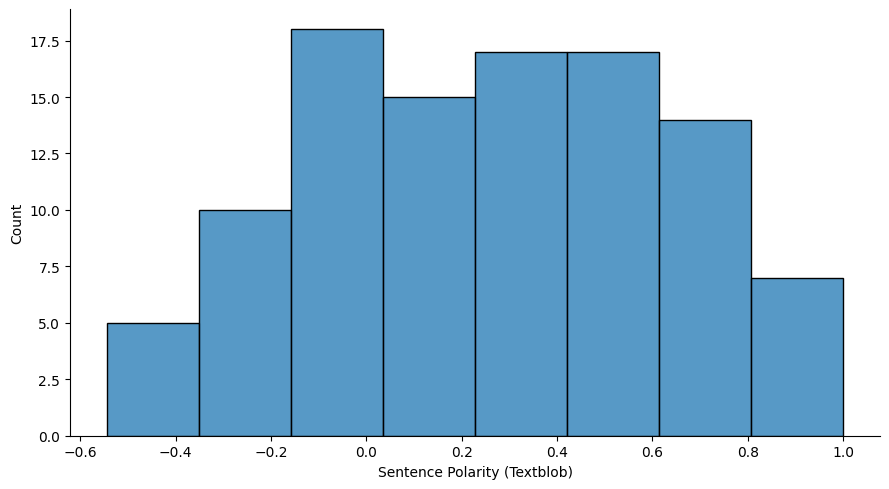

In [22]:
sns.displot(df["Polarity Score"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

* we can see polarity scores are mostly around zero.
* negativity is very less in these articles.

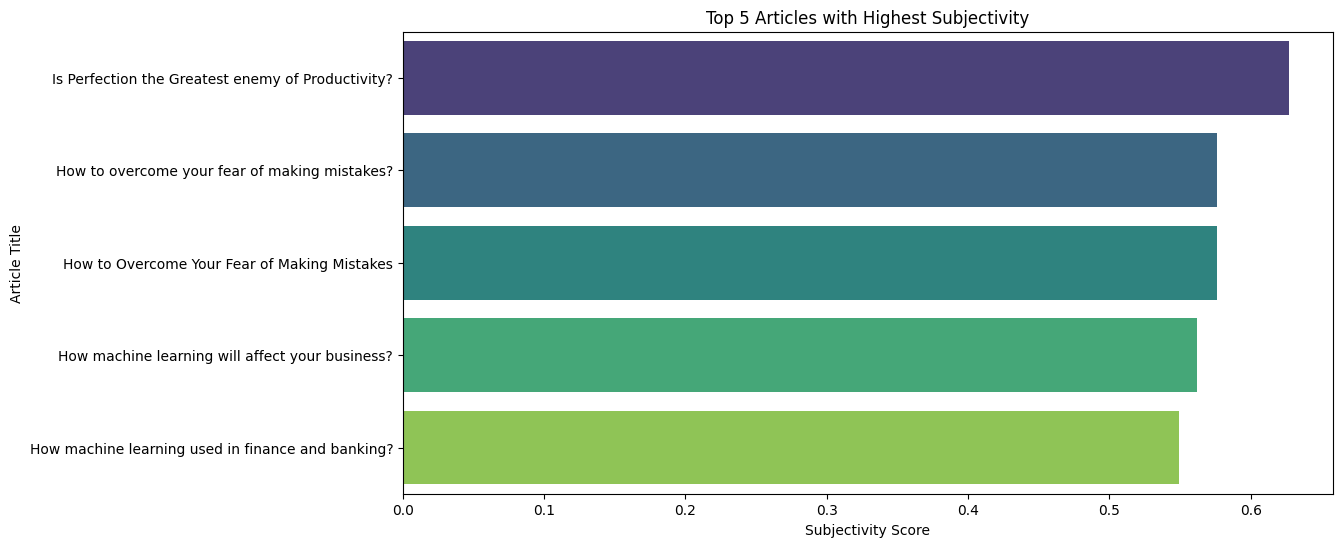

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 articles with highest subjectivity
top_subjectivity_articles = df.nlargest(5, "Subjectivity Score")

# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_subjectivity_articles, x="Subjectivity Score", y="Title", palette="viridis")

# Set plot title and labels
plt.title("Top 5 Articles with Highest Subjectivity")
plt.xlabel("Subjectivity Score")
plt.ylabel("Article Title")

# Show the plot
plt.show()


## Overall Insights from the Project:

 1) Sentiment Distribution:
The distribution of polarity scores across all articles indicates a predominantly neutral sentiment. This suggests that a substantial portion of the articles may have balanced views or present information objectively.

2)High Fog Index Articles:
The articles with high Fog Index values, such as 'How AI will impact the future of work?' and 'How will COVID-19 affect the world of work?', are likely addressing intricate subjects. Their high complexity suggests that they involve technical terms and in-depth explanations.

* Complexity and COVID-19:
Articles discussing the impact of COVID-19, like 'How will COVID-19 affect the world of work?', exhibit high Fog Index values due to their complex analysis of pandemic-related topics. Complex discussions on healthcare, economics, and workforce dynamics contribute to this complexity.

* Leadership and Technical Expertise:
'Can You Be a Great Leader Without Technical Expertise' engages in nuanced discussions on leadership and technical skills. The high Fog Index indicates a multifaceted exploration, possibly involving diverse perspectives and scenarios.


3)Subjectivity and Polarity:
The relationship between subjectivity and polarity scores reveals how the subjective nature of articles might influence their sentiment.More subjective articles might exhibit stronger positive or negative sentiments.

4)Highly Positive/Negative Articles:
Articles with exceptionally high positive or negative polarity scores are highly opinionated. Identifying them helps understand articles with strong sentiment expressions and potential biases.


5)COVID-Related Word Clouds:
The dominance of COVID-related words in both positive and negative word clouds signifies the pandemic's significant influence on the analyzed content.
The prevalence of COVID-related words indicates a sustained demand for pandemic-related information, which requires consistent and diverse content to cater to reader engagement.


6)Word Clouds:
Word clouds visually highlight the most frequent words in positive and negative articles. The prevalence of certain words might suggest prevalent themes or topics in these sentiment categories.

7) high subjectivity articles:


8)Insights for Decision-Making:
These insights can guide content creation strategies, allowing you to tailor articles for reader engagement and address diverse topics while maintaining a balance between objectivity and subjectivity.

In summary, the project's EDA revealed a rich landscape of sentiment, complexity, and linguistic characteristics across various articles. The insights gathered offer valuable information to content creators, guiding them in producing relevant, engaging, and balanced content that resonates with readers' preferences and trends in sentiment.

# FUTURE DEVELOPMENT

here are some potential avenues for future work and enhancements based on the current project:

## Fine-tuning Sentiment Analysis Models:
Consider training custom sentiment analysis models on domain-specific data to improve accuracy. Fine-tuning can help capture nuanced sentiments related to specific topics.


## Predictive Analytics:
 Develop predictive models to forecast sentiment trends based on historical data. This can help content creators anticipate reader reactions and adapt their strategies.

 * Sentiment Prediction:
 You can build a predictive model that takes as input the text of an article and predicts its sentiment as positive, negative, or neutral. This can help automate the sentiment analysis process and categorize articles based on their emotional tone.

* Article Complexity Prediction:
Based on features like average word length, syllables per word, and percentage of complex words, you can develop a model to predict the complexity level of an article. This could help readers identify articles that match their reading comprehension level.

* Engagement Prediction:
Using features such as word count, average sentence length, and sentiment scores, you can predict the level of reader engagement an article is likely to receive. Higher engagement articles might have more shares, comments, and likes.

* Subjectivity Prediction:
 Build a model to predict the subjectivity level of an article. This can be helpful for readers looking for objective or subjective content, depending on their preferences.

* Category Prediction:
If you have categorized your articles into different topics or domains, you can predict the category of a new article based on its textual features. This can aid in automatic content categorization.

* Article Popularity Prediction:
Combine sentiment, subjectivity, and other features to predict the popularity of an article. This prediction could include metrics such as page views, time spent on the page, and social media shares.

* Reader Reaction Prediction:
 Given historical data on reader reactions (e.g., comments, likes, dislikes), you can build a model to predict the potential reactions an article might receive.

* Editorial Decision Support:
Use predictive analysis to provide recommendations to editors on which articles to feature prominently based on predicted sentiment, subjectivity, or other factors.

* Sentiment Change Prediction:
If your articles have timestamps, you can predict how the sentiment of an article might change over time. For example, you could predict whether an article's sentiment will become more positive or negative over the next week.

* Reader Engagement Timing:
Predict the best times to publish articles for maximum reader engagement based on historical engagement patterns.


## Sentiment for Marketing:
 Utilize sentiment analysis insights for targeted marketing campaigns. For example, positive articles can be promoted more extensively.


## User Surveys:
Collect user feedback on the sentiment conveyed by articles to validate sentiment analysis results.

## CHALLENGES IN SENTIMENTAL ANALYSIS

* Sarcasm and Irony:
Detecting sarcasm and irony in text is challenging because the literal meaning of the words may be opposite to the intended sentiment. Context and tone play a crucial role in understanding these nuances.

* Contextual Sentiment:
Understanding sentiment in context is complex. The sentiment of a word can change based on the surrounding words. For instance, "not bad" might seem positive, but it's actually a mild negative sentiment.

* Ambiguity:
Some words have multiple meanings, and their sentiment can vary accordingly. A word like "sick" could mean impressive (positive) or unwell (negative) based on the context.

* Emojis and Emoticons:
Emojis and emoticons can convey sentiment but can also be ambiguous. For instance, the sentiment behind a smiling face might not be straightforward, as it could be genuine or ironic.

# Overall Impact:

1)Despite these challenges, this project has immense potential. The insights gained from sentiment analysis can guide content creators and marketers in tailoring their messaging to their audience's sentiments."

2)"Moreover, accurate content understanding can lead to better personalized recommendations for readers, enhancing user experience."

3)"By addressing these complexities, sentiment analysis can contribute to more meaningful interactions between businesses and their audiences."